<a href="https://colab.research.google.com/github/Thackshanaramana18/cybersecurity_comments/blob/main/Stock_Insights_Predictive_Analytics_and_Sentiment_Analysis_of_Market_Trends_by_Thackshana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RECRUITMENT
## NAME: THACKSHANARAMANA B
## REG NO.: RA2311047010182
## YEAR/DEPARTMENT: 2/CINTEL


In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the dataset
stock_data = pd.read_excel('/content/nifty_500.csv')

# Encoding categorical variables
label_encoder_industry = LabelEncoder()
label_encoder_series = LabelEncoder()

stock_data['Industry'] = label_encoder_industry.fit_transform(stock_data['Industry'])
stock_data['Series'] = label_encoder_series.fit_transform(stock_data['Series'])

# Convert all relevant numeric columns to numeric types
numeric_columns = ['Open', 'High', 'Low', 'Previous Close', 'Change', 'Percentage Change', 'Last Traded Price']
stock_data[numeric_columns] = stock_data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Fill missing values in numeric columns
stock_data[numeric_columns] = stock_data[numeric_columns].fillna(stock_data[numeric_columns].mean())


In [10]:
# Define features and target for regression
X = stock_data[['Open', 'High', 'Low', 'Previous Close', 'Change', 'Percentage Change', 'Industry', 'Series']]
y = stock_data['Last Traded Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implementing Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predicting on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluating the regression model
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse}, MAE: {mae}")


RMSE: 397.5303247379921, MAE: 69.50941089108906


In [11]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Convert Percentage Change into binary target (positive = 1, negative = 0)
stock_data['Binary Change'] = (stock_data['Percentage Change'] > 0).astype(int)

# Define features and target for classification
X_class = stock_data[['Open', 'High', 'Low', 'Previous Close', 'Change', 'Percentage Change', 'Industry', 'Series']]
y_class = stock_data['Binary Change']

# Split the data into training and testing sets
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Implementing SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_class, y_train_class)

# Predicting on the test set
y_pred_class_svm = svm_model.predict(X_test_class)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test_class, y_pred_class_svm)
precision_svm = precision_score(y_test_class, y_pred_class_svm)
recall_svm = recall_score(y_test_class, y_pred_class_svm)
f1_svm = f1_score(y_test_class, y_pred_class_svm)

print(f"Accuracy: {accuracy_svm}, Precision: {precision_svm}, Recall: {recall_svm}, F1-Score: {f1_svm}")


Accuracy: 0.9900990099009901, Precision: 0.9807692307692307, Recall: 1.0, F1-Score: 0.9902912621359222


In [12]:
from sklearn.ensemble import RandomForestClassifier

# Implementing Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_class, y_train_class)

# Predicting on the test set
y_pred_class_rf = rf_classifier.predict(X_test_class)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test_class, y_pred_class_rf)
precision_rf = precision_score(y_test_class, y_pred_class_rf)
recall_rf = recall_score(y_test_class, y_pred_class_rf)
f1_rf = f1_score(y_test_class, y_pred_class_rf)

print(f"Random Forest - Accuracy: {accuracy_rf}, Precision: {precision_rf}, Recall: {recall_rf}, F1-Score: {f1_rf}")


Random Forest - Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1-Score: 1.0


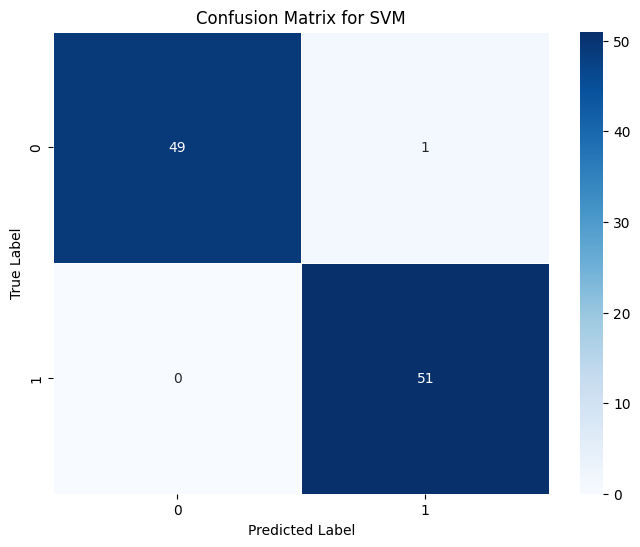

Classification Report for SVM:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.98      1.00      0.99        51

    accuracy                           0.99       101
   macro avg       0.99      0.99      0.99       101
weighted avg       0.99      0.99      0.99       101



In [16]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Confusion matrix for SVM
conf_matrix = confusion_matrix(y_test_class, y_pred_class_svm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.title('Confusion Matrix for SVM')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Classification report
print("Classification Report for SVM:")
print(classification_report(y_test_class, y_pred_class_svm))


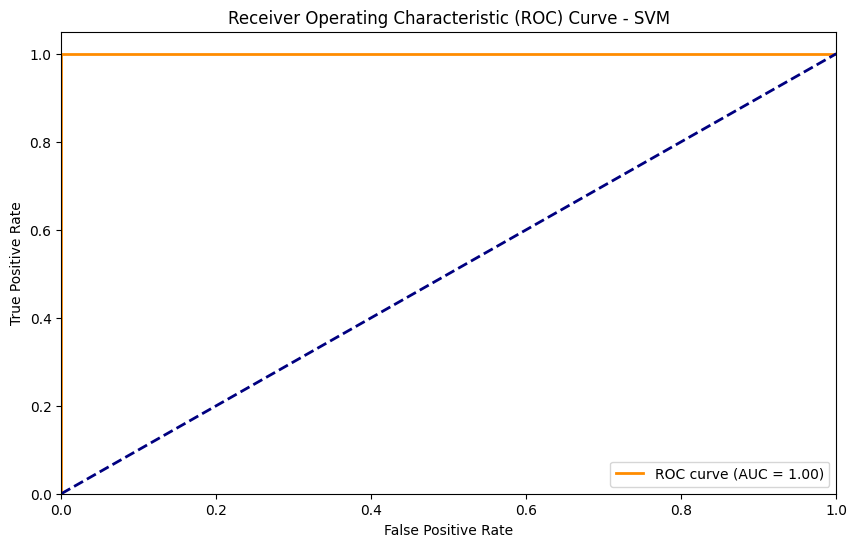

In [17]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probability scores
y_scores_svm = svm_model.decision_function(X_test_class)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test_class, y_scores_svm)
roc_auc = roc_auc_score(y_test_class, y_scores_svm)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - SVM')
plt.legend(loc="lower right")
plt.show()


In [15]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
stock_data = pd.read_excel('/content/nifty_500.csv')

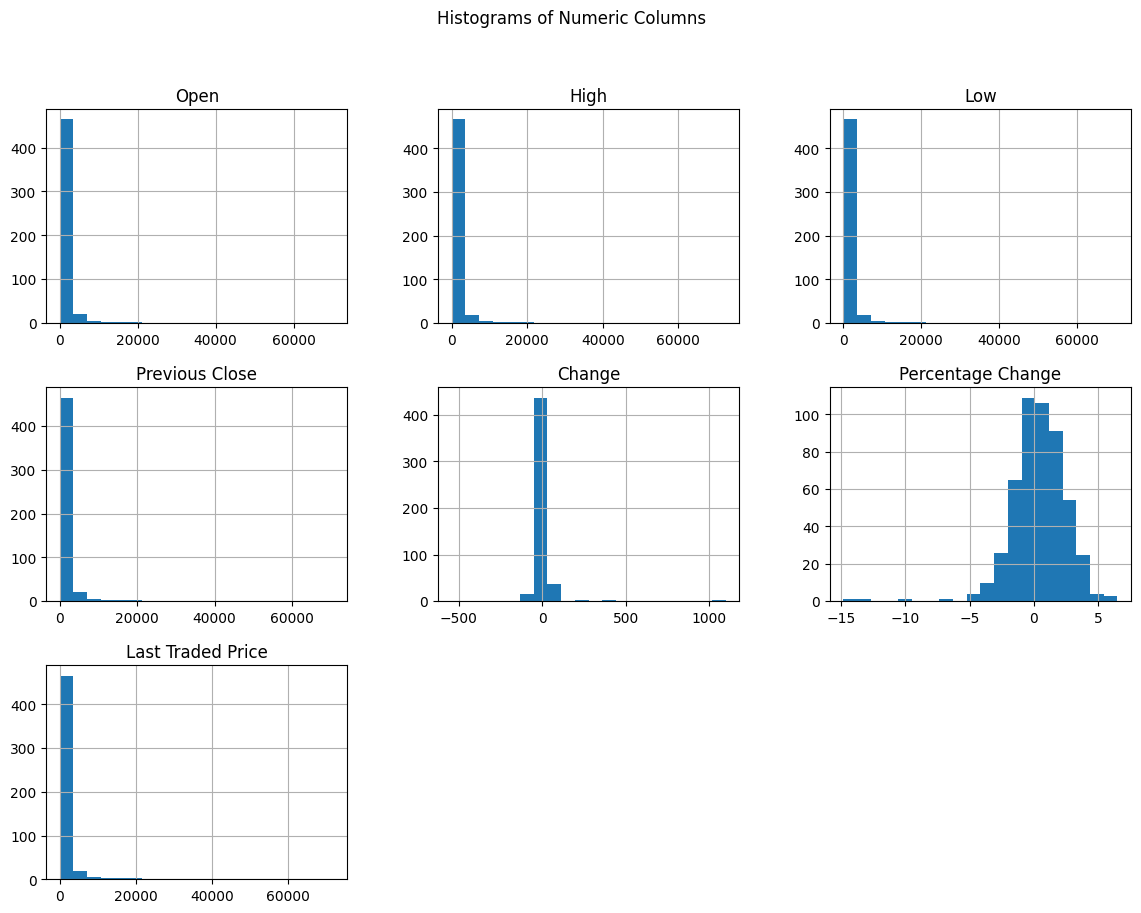

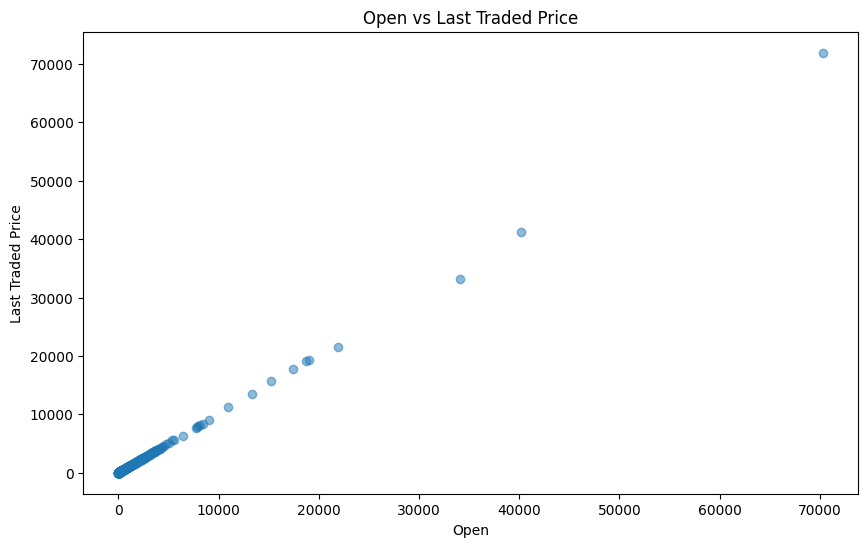

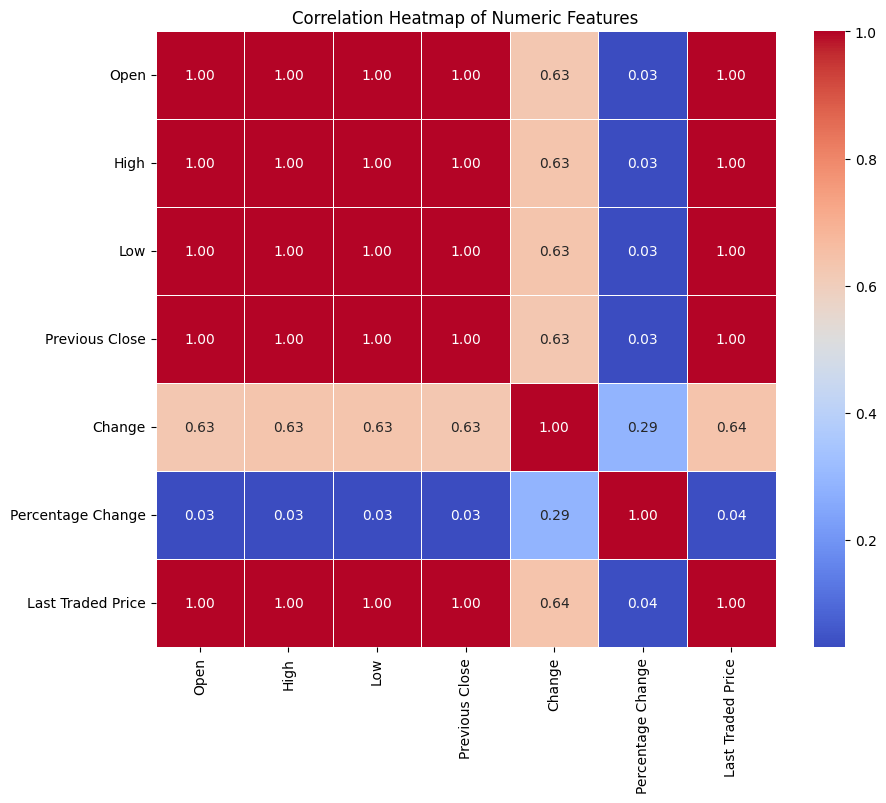

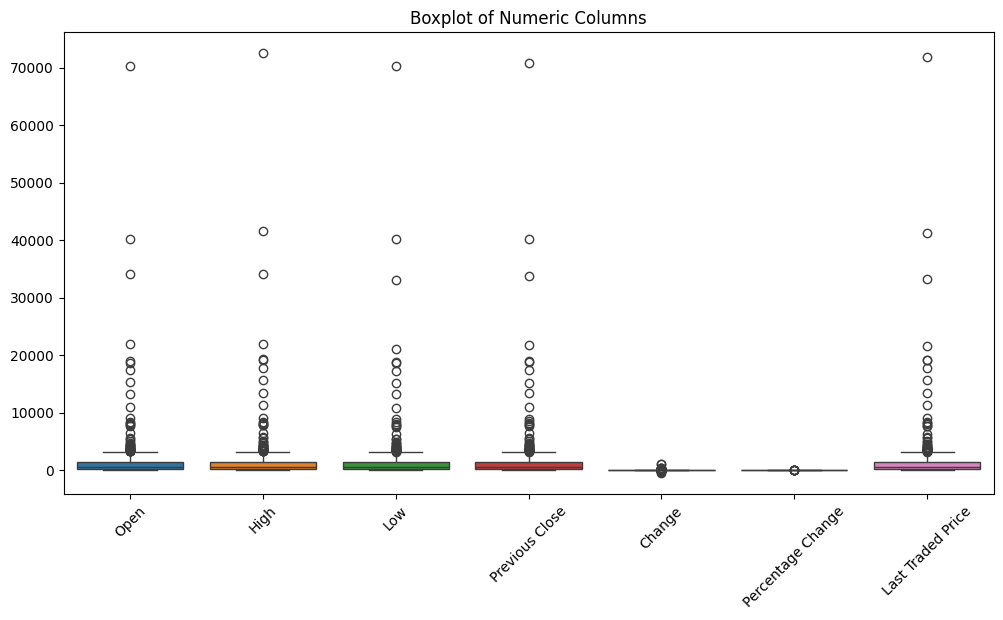

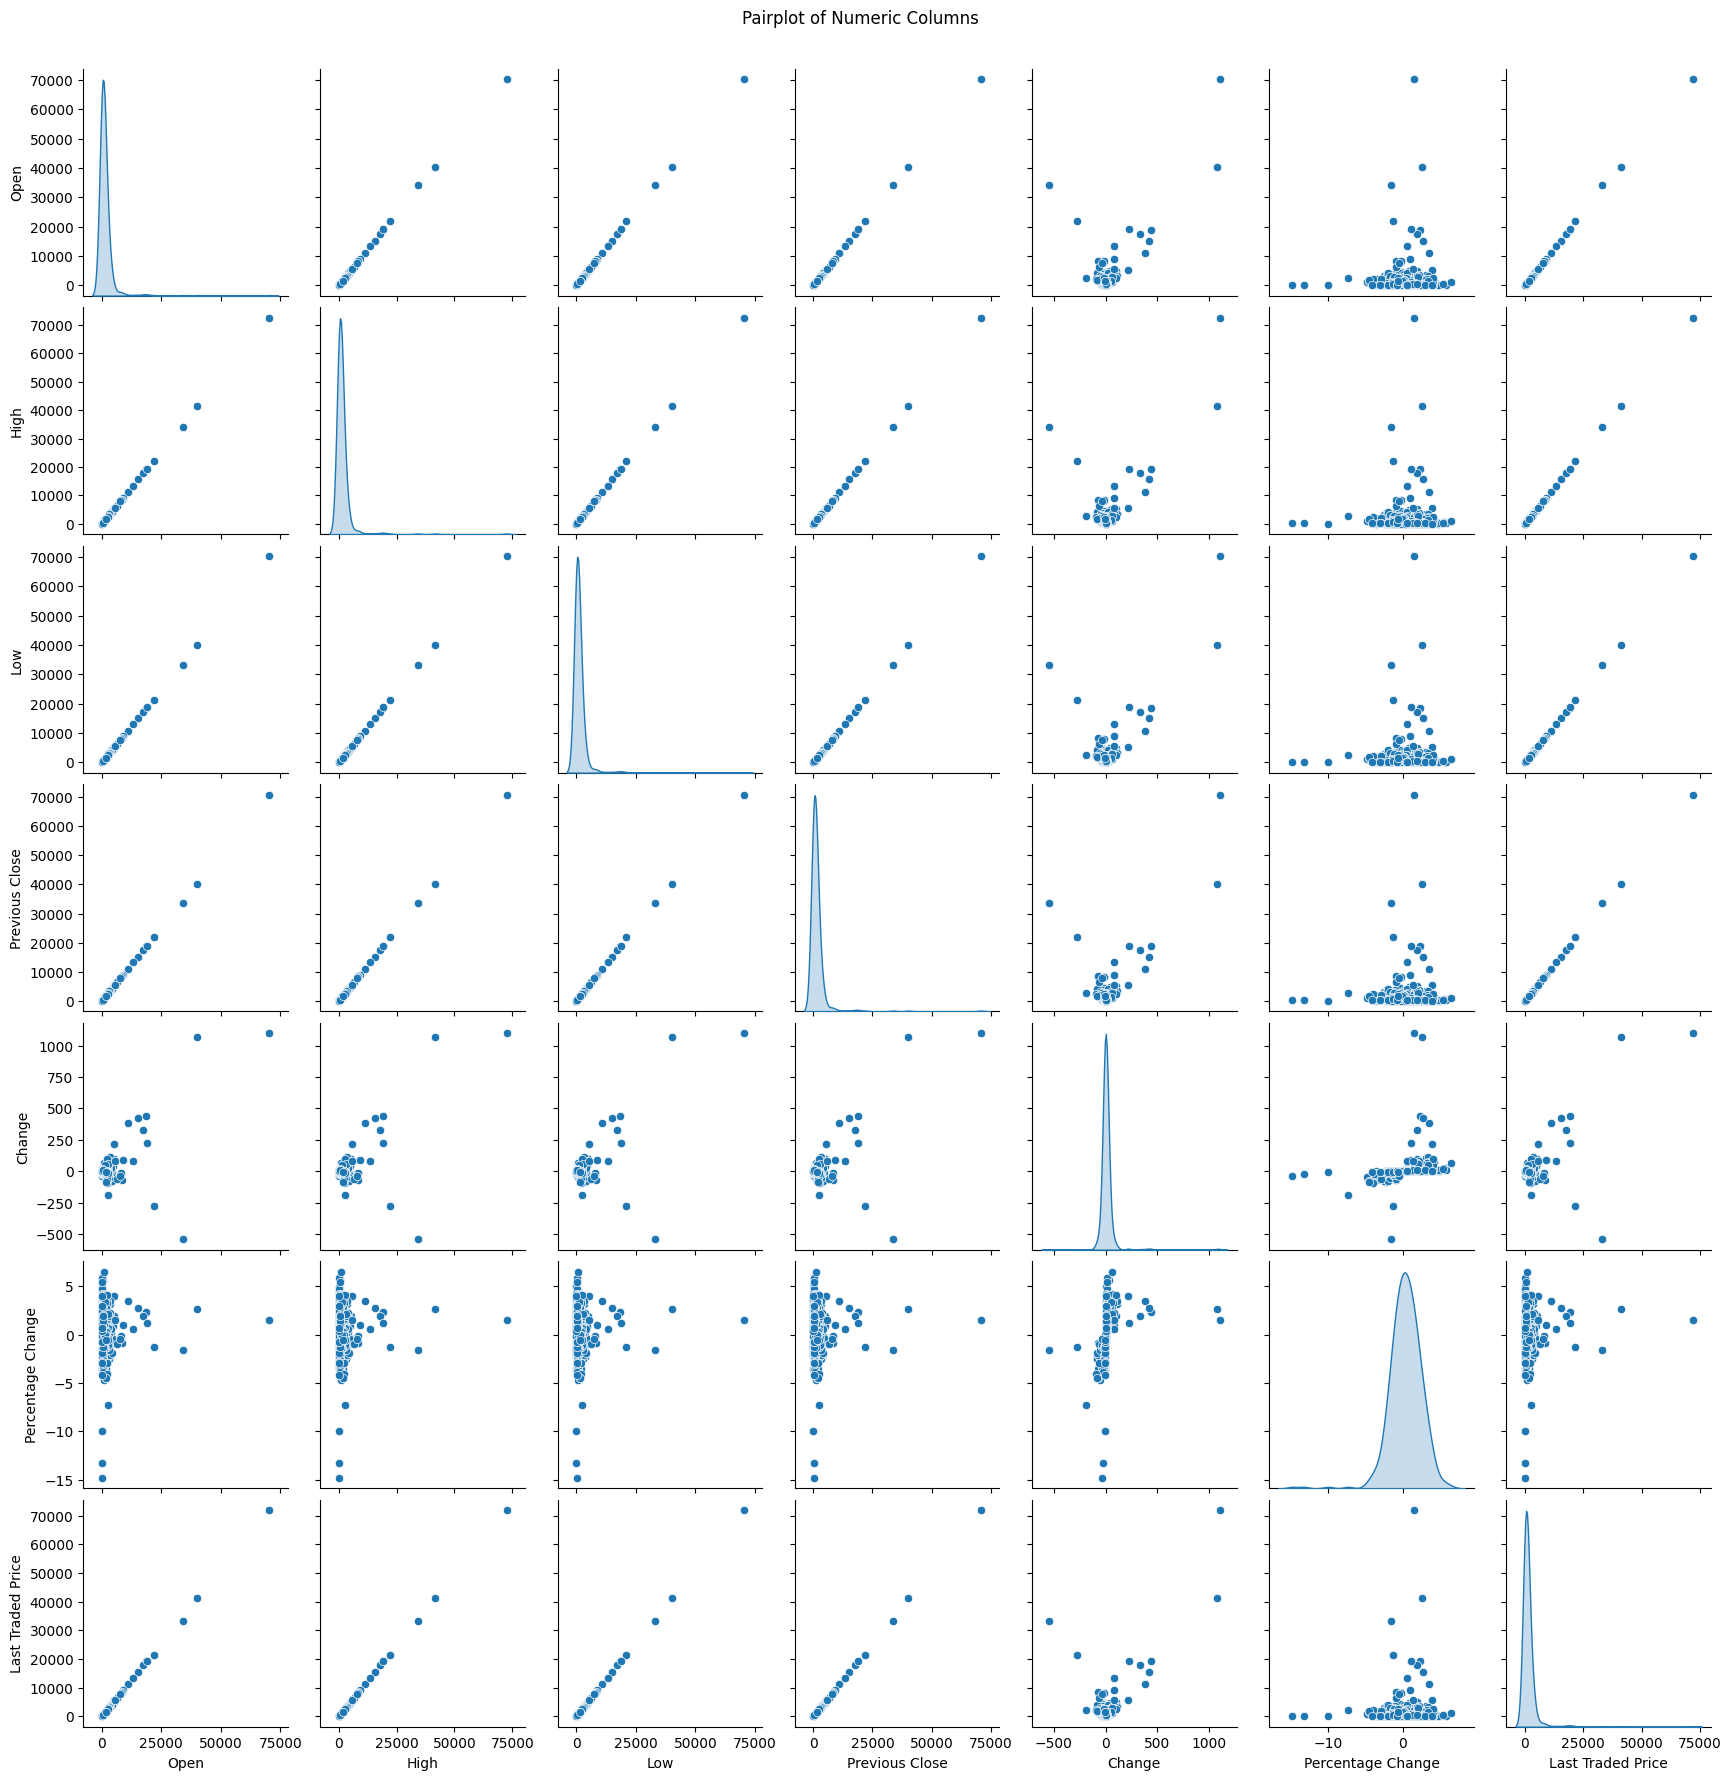

In [16]:


# Convert all relevant numeric columns to numeric types
numeric_columns = ['Open', 'High', 'Low', 'Previous Close', 'Change', 'Percentage Change', 'Last Traded Price']
stock_data[numeric_columns] = stock_data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Fill missing values in numeric columns
stock_data[numeric_columns] = stock_data[numeric_columns].fillna(stock_data[numeric_columns].mean())

# 1. Histogram for numeric columns
stock_data[numeric_columns].hist(bins=20, figsize=(14, 10))
plt.suptitle('Histograms of Numeric Columns')
plt.show()

# 2. Scatter plot to visualize relationships between two features
plt.figure(figsize=(10, 6))
plt.scatter(stock_data['Open'], stock_data['Last Traded Price'], alpha=0.5)
plt.title('Open vs Last Traded Price')
plt.xlabel('Open')
plt.ylabel('Last Traded Price')
plt.show()

# 3. Correlation heatmap
plt.figure(figsize=(10, 8))
corr = stock_data[numeric_columns].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

# 4. Boxplot to visualize distributions of numeric columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=stock_data[numeric_columns])
plt.xticks(rotation=45)
plt.title('Boxplot of Numeric Columns')
plt.show()

# 5. Pairplot for pairwise relationships in the dataset
sns.pairplot(stock_data[numeric_columns], diag_kind='kde')
plt.suptitle('Pairplot of Numeric Columns', y=1.02)
plt.show()

# 6. Line plot for stock price trends over time (if a Date column exists, replace 'Date' with the actual column name)
if 'Date' in stock_data.columns:
    stock_data['Date'] = pd.to_datetime(stock_data['Date'], errors='coerce')
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data['Date'], stock_data['Last Traded Price'])
    plt.title('Stock Price Trends Over Time')
    plt.xlabel('Date')
    plt.ylabel('Last Traded Price')
    plt.show()


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define features and target for regression
X = stock_data[['Open', 'High', 'Low', 'Previous Close', 'Change', 'Percentage Change']]
y = stock_data['Last Traded Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implementing Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predicting on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluating the regression model
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse}, MAE: {mae}")


RMSE: 366.4299264305488, MAE: 64.26129207920796
